In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# import
train = pd.read_csv('datasets/train.csv')

# pythonize columns
train.columns = [x.lower().replace(' ','_').replace('/','_') for x in train.columns]

# drop id and set pid as index
train.set_index('pid', inplace = True)
train.drop('id', axis = 1, inplace = True)

train.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
pid,,,,,,,,,,,,,,,,,,,,,
533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
train.shape

(2051, 79)

# Review Data and Individual Columns for Outliers, etc.

###  Cols 1 - 10

In [4]:
train.dtypes[:10]

ms_subclass       int64
ms_zoning        object
lot_frontage    float64
lot_area          int64
street           object
alley            object
lot_shape        object
land_contour     object
utilities        object
lot_config       object
dtype: object

**Observations**
1.  `ms_subclass` should be an object so we don't lose leading zeroes
2.  Everything else looks like the appropriate dtype

In [5]:
train.ms_subclass.unique()

array([ 60,  20,  50, 180, 160,  70, 120, 190,  85,  30,  90,  80,  75,
        45,  40, 150], dtype=int64)

In [6]:
train.ms_subclass = ['0' + str(i) if len(str(i)) == 2 else str(i) for i in train.ms_subclass]
train.ms_subclass.unique()

array(['060', '020', '050', '180', '160', '070', '120', '190', '085',
       '030', '090', '080', '075', '045', '040', '150'], dtype=object)

In [7]:
# check for nulls
train.isnull().sum()[:10]

ms_subclass        0
ms_zoning          0
lot_frontage     330
lot_area           0
street             0
alley           1911
lot_shape          0
land_contour       0
utilities          0
lot_config         0
dtype: int64

**Observations**
1. `alley` has 1911 nulls out of 2051 records. This is a good candidate for dropping.
2. `lot_frontage` has 16% null coverage .. this might be good
3. Everything else looks good!

In [8]:
train.alley.unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

**Note** `alley` doesn't have an 'NA' values as the data dictionary finds ... nan could be an alias(?) 

In [9]:
train[['lot_area']].value_counts()

lot_area
9600        34
7200        27
6000        26
10800       19
7500        18
            ..
8834         1
8826         1
8820         1
8816         1
159000       1
Length: 1476, dtype: int64

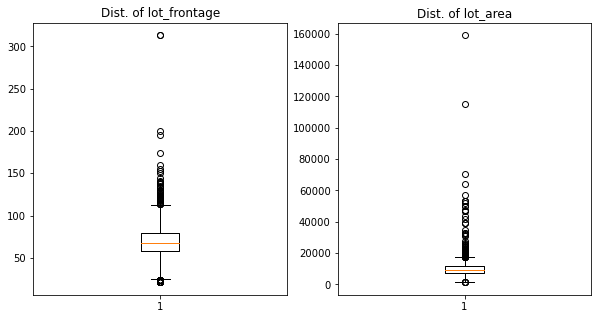

In [10]:
# map continuous variables to find outliers
figure, ax = plt.subplots(1,2,figsize = (10,5))

ax[0].boxplot(train[~train.lot_frontage.isnull()].lot_frontage)
ax[0].set_title('Dist. of lot_frontage')

ax[1].boxplot(train[~train.lot_area.isnull()].lot_area)
ax[1].set_title('Dist. of lot_area');

**Observation**
  *  There is 1 extreme outlier for `lot_frontage`
  *  There are 2 extreme outliers for `lot_area`

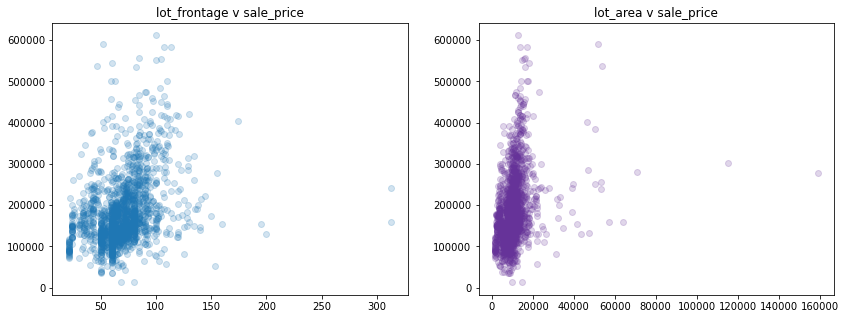

In [11]:
figure, ax = plt.subplots(1,2,figsize = (14,5))

ax[0].scatter(train.lot_frontage, train.saleprice,
              alpha = 0.2)
ax[0].set_title('lot_frontage v sale_price')

ax[1].scatter(train.lot_area, train.saleprice,
              alpha = 0.2,
              color = 'rebeccapurple')
ax[1].set_title('lot_area v sale_price');
              

**Observation**
  *  `lot_frontage` outliers for sure above 300
  *  `lot_area` 2 outliers beyond 100_000

In [12]:
train.columns[:10]

Index(['ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config'],
      dtype='object')

In [13]:
# review ms_zoning unique values
train.ms_zoning.unique()

array(['RL', 'RM', 'FV', 'C (all)', 'A (agr)', 'RH', 'I (all)'],
      dtype=object)

In [14]:
# update C A and I to represent their zones from data dict
train.ms_zoning = train.ms_zoning.apply(lambda x: x[0] if len(x)>2 else x)
train.ms_zoning.unique()

array(['RL', 'RM', 'FV', 'C', 'A', 'RH', 'I'], dtype=object)

In [15]:
train.street.unique()

# looks good!

array(['Pave', 'Grvl'], dtype=object)

In [16]:
# review lot_shape
train.lot_shape.unique()

# looks good!

array(['IR1', 'Reg', 'IR2', 'IR3'], dtype=object)

In [17]:
# review land_contour
train.land_contour.unique()

# looks good!

array(['Lvl', 'HLS', 'Bnk', 'Low'], dtype=object)

In [18]:
# review utilities
train.utilities.unique()

# looks good!

array(['AllPub', 'NoSeWa', 'NoSewr'], dtype=object)

In [19]:
# review log_config
train.lot_config.unique()

# looks good

array(['CulDSac', 'Inside', 'Corner', 'FR2', 'FR3'], dtype=object)

### Recommendations for 1-10
  *  `alley` should be dropped if nan values are not deterministic of no alley access
  *  outliers for `lot_frontage` and `lot_area` should be excluded when doing analyses with those variables

###  Cols 11 - 20

In [20]:
train.dtypes[10:20]

land_slope        object
neighborhood      object
condition_1       object
condition_2       object
bldg_type         object
house_style       object
overall_qual       int64
overall_cond       int64
year_built         int64
year_remod_add     int64
dtype: object

**Observations**
1.  `overall_qual` and `overall_cond` are Ordinal type variables. Consider updating them to be str

In [21]:
#update to str
train.overall_qual = train.overall_qual.apply(lambda x: str(x))
train.overall_cond = train.overall_cond.apply(lambda x: str(x))

In [22]:
# check for nulls
train.isnull().sum()[10:20]

# no nulls!

land_slope        0
neighborhood      0
condition_1       0
condition_2       0
bldg_type         0
house_style       0
overall_qual      0
overall_cond      0
year_built        0
year_remod_add    0
dtype: int64

In [23]:
# review land_slope
train.land_slope.unique()

# looks good!

array(['Gtl', 'Sev', 'Mod'], dtype=object)

In [24]:
# review neighborhood
neighborhood_from_dict = ['Blmngtn','Blueste','BrDale','BrkSide','ClearCr','CollgCr','Crawfor','Edwards',\
                          'Gilbert','Greens','GrnHill','IDOTRR','Landmrk','MeadowV','Mitchel','Names','NoRidge',\
                          'NPkVill','NridgHt','NWAmes','OldTown','SWISU','Sawyer','SawyerW','Somerst','StoneBr',\
                          'Timber','Veenker']

train[~train.neighborhood.isin(neighborhood_from_dict)].neighborhood.unique()


array(['NAmes'], dtype=object)

In [25]:
# Replace 'NAmes' with nan
train.neighborhood = [np.nan if val == 'NAmes' else val for val in train.neighborhood]

train[~train.neighborhood.isin(neighborhood_from_dict)].neighborhood.unique()

array([nan], dtype=object)

In [26]:
# review condition_1
train.condition_1.unique()

# looks good

array(['RRAe', 'Norm', 'PosA', 'Artery', 'Feedr', 'PosN', 'RRAn', 'RRNe',
       'RRNn'], dtype=object)

In [27]:
# review condition_2
condition_2_from_dict = ['Artery','Feedr','Norm','RRNn','RRAn','PosN','PosA','RRNe','RRAe']

train[~train.condition_2.isin(condition_2_from_dict)].condition_2.unique()

# looks good

array([], dtype=object)

In [28]:
# review bldg_type
train.bldg_type.unique()

array(['1Fam', 'TwnhsE', 'Twnhs', '2fmCon', 'Duplex'], dtype=object)

**Observation**
  *  `bldg_type` value 'Twnhs' does not exist in the data dict. May be for 'TwnhsI'

In [29]:
# review house_style
sorted(train.house_style.unique())

# looks good

['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story', 'SFoyer', 'SLvl']

In [30]:
# review overall_qual
sorted(train.overall_qual.unique())

# looks good

['1', '10', '2', '3', '4', '5', '6', '7', '8', '9']

In [31]:
# review overall_cond
sorted(train.overall_cond.unique())

# looks good

['1', '2', '3', '4', '5', '6', '7', '8', '9']

In [32]:
# review year_built
sorted(train.year_built.unique())

# looks good

[1872,
 1875,
 1879,
 1880,
 1885,
 1890,
 1892,
 1893,
 1895,
 1896,
 1898,
 1900,
 1901,
 1905,
 1908,
 1910,
 1911,
 1912,
 1913,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010]

In [33]:
# review year_remod_add
sorted(train.year_remod_add.unique())

# looks good

[1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010]

### Recommendations for 10-20
  *  `bldg_type` value 'Twnhs' updated to 'TwnhsI' if it can be confirmed

### Cols 21-30

In [34]:
train.dtypes[20:30]

# looks good!

roof_style       object
roof_matl        object
exterior_1st     object
exterior_2nd     object
mas_vnr_type     object
mas_vnr_area    float64
exter_qual       object
exter_cond       object
foundation       object
bsmt_qual        object
dtype: object

In [35]:
# check for nulls
train.isnull().sum()[20:30]

roof_style       0
roof_matl        0
exterior_1st     0
exterior_2nd     0
mas_vnr_type    22
mas_vnr_area    22
exter_qual       0
exter_cond       0
foundation       0
bsmt_qual       55
dtype: int64

**Observation**
  *  No major amounts of nulls

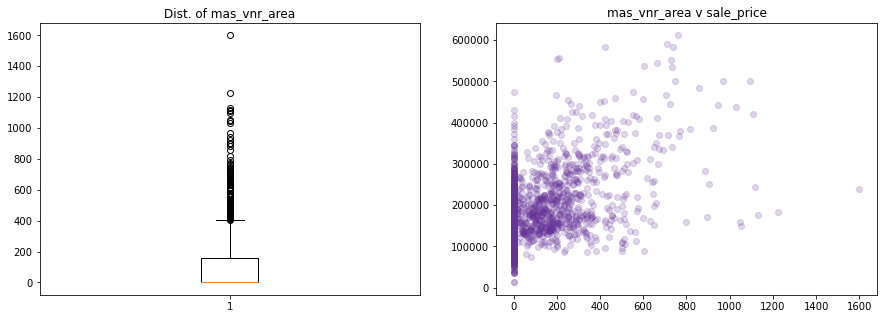

In [36]:
# map continuous variables to find outliers
figure, ax = plt.subplots(1,2,figsize = (15,5))

ax[0].boxplot(train[~train.mas_vnr_area.isnull()].mas_vnr_area)
ax[0].set_title('Dist. of mas_vnr_area')

ax[1].scatter(train.mas_vnr_area, train.saleprice,
              alpha = 0.2,
              color = 'rebeccapurple')
ax[1].set_title('mas_vnr_area v sale_price');

In [37]:
train.mas_vnr_area.value_counts()

0.0      1216
120.0      11
176.0      10
200.0      10
108.0       9
         ... 
142.0       1
215.0       1
235.0       1
233.0       1
426.0       1
Name: mas_vnr_area, Length: 373, dtype: int64

**Observation**
  *  `mas_vnr_area` has a 59% 0 rate, Might need to be dropped

In [38]:
# review roof_style
sorted(train.roof_style.unique())

# looks good!

['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed']

In [39]:
# review roof_matl
sorted(train.roof_matl.unique())

# looks good!

['ClyTile', 'CompShg', 'Membran', 'Tar&Grv', 'WdShake', 'WdShngl']

In [40]:
# review exterior_1st
exterior_1st_from_dict = ['AsbShng','AsphShn','BrkComm','BrkFace','CBlock','CemntBd','HdBoard','ImStucc',\
                          'MetalSd','Other','Plywood','PreCast','Stone','Stucco','VinylSd','Wd Sdng','WdShing']


train[~train.exterior_1st.isin(exterior_1st_from_dict)]

# looks good!

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
pid,,,,,,,,,,,,,,,,,,,,,


In [41]:
# review exterior_2nd
train[~train.exterior_2nd.isin(exterior_1st_from_dict)].exterior_2nd.unique()

array(['CmentBd', 'Wd Shng', 'Brk Cmn'], dtype=object)

In [42]:
# replace vals
train.exterior_2nd = ['CemntBd' if val == 'CmentBd' else 'WdShing' if val == 'Wd Shng' else 'BrkComm' if val == 'Brk Cmn'\
else val for val in train.exterior_2nd]

train[~train.exterior_2nd.isin(exterior_1st_from_dict)].exterior_2nd.unique()

array([], dtype=object)

In [43]:
# review mas_vnr_type
train.mas_vnr_type.unique()

# nan could be NA

array(['BrkFace', 'None', nan, 'Stone', 'BrkCmn'], dtype=object)

In [44]:
# review exter_qual
sorted(train.exter_qual.unique())

# looks good

['Ex', 'Fa', 'Gd', 'TA']

In [45]:
# review exter_cond
sorted(train.exter_cond.unique())

['Ex', 'Fa', 'Gd', 'Po', 'TA']

In [46]:
# review foundation
sorted(train.foundation.unique())

# looks good!

['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood']

In [47]:
# review bsmt_qual
train.bsmt_qual.unique()

# nan could be NA

array(['TA', 'Gd', 'Fa', nan, 'Ex', 'Po'], dtype=object)

### Recommendations 21-30
  *  `mas_vnr_area` has 59% zeroes with a large range within that value. Most likely should be excluded
  *  nan values could be NA values from data dictionary for `mas_vnr_type` and `bsmt_qual`

### 31-40

In [48]:
train.dtypes[30:40]

# looks good!

bsmt_cond          object
bsmt_exposure      object
bsmtfin_type_1     object
bsmtfin_sf_1      float64
bsmtfin_type_2     object
bsmtfin_sf_2      float64
bsmt_unf_sf       float64
total_bsmt_sf     float64
heating            object
heating_qc         object
dtype: object

In [49]:
# check for nulls
train.isnull().sum()[30:40]

bsmt_cond         55
bsmt_exposure     58
bsmtfin_type_1    55
bsmtfin_sf_1       1
bsmtfin_type_2    56
bsmtfin_sf_2       1
bsmt_unf_sf        1
total_bsmt_sf      1
heating            0
heating_qc         0
dtype: int64

**Observation**
  *  No major amounts of nulls

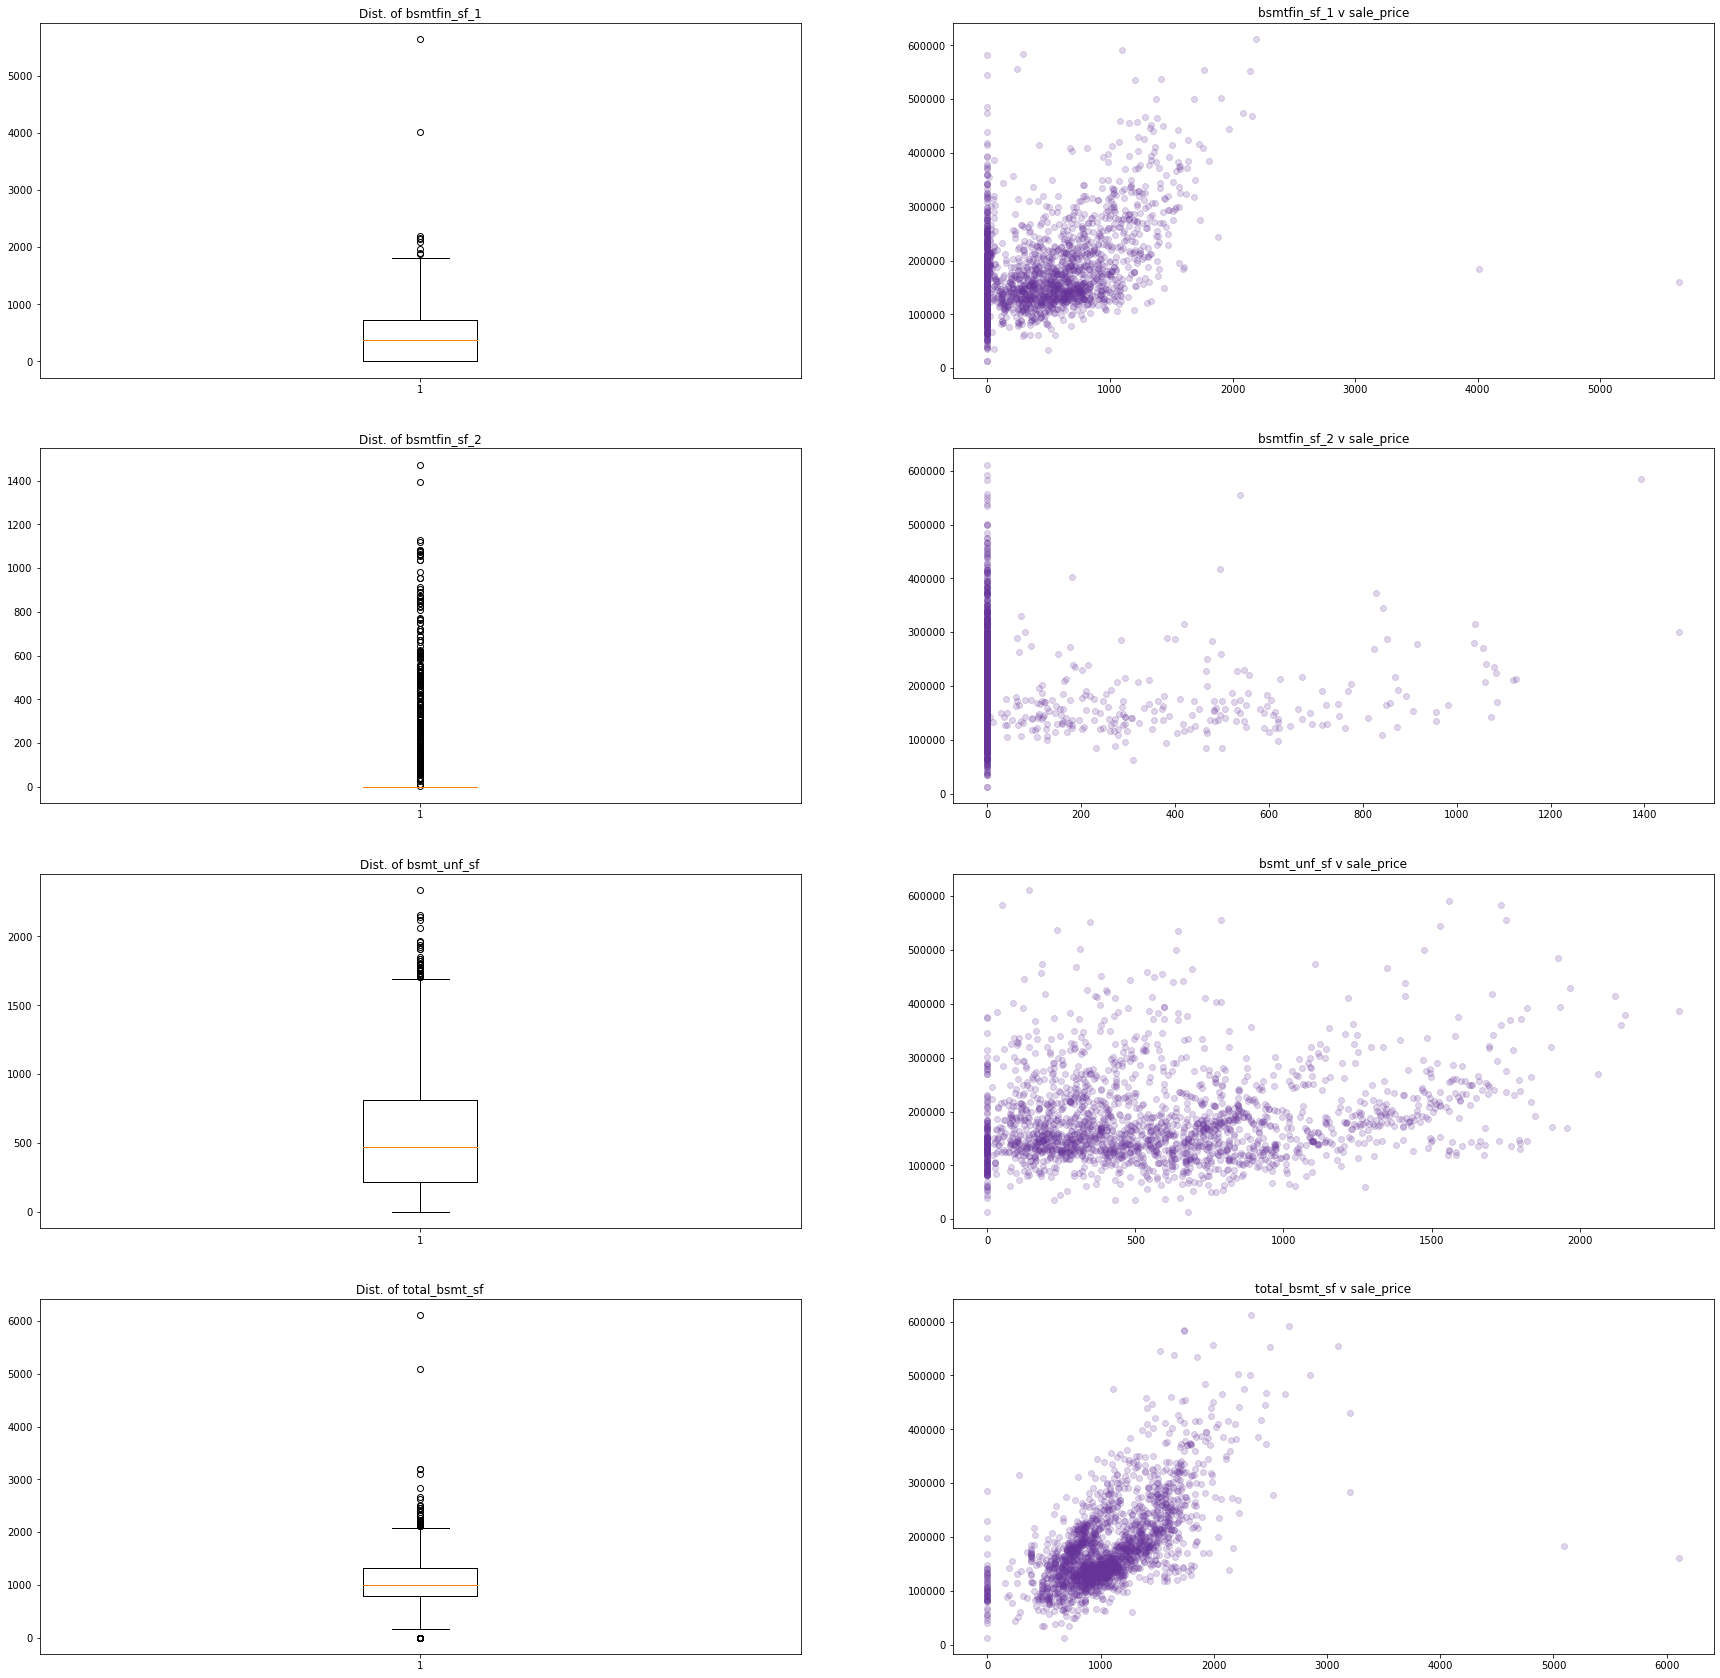

In [50]:
# map continuous variables to find outliers
figure, ax = plt.subplots(4,2,figsize = (30,30))

ax[0][0].boxplot(train[~train.bsmtfin_sf_1.isnull()].bsmtfin_sf_1)
ax[0][0].set_title('Dist. of bsmtfin_sf_1')

ax[0][1].scatter(train.bsmtfin_sf_1, train.saleprice,
              alpha = 0.2,
              color = 'rebeccapurple')
ax[0][1].set_title('bsmtfin_sf_1 v sale_price');


ax[1][0].boxplot(train[~train.bsmtfin_sf_2.isnull()].bsmtfin_sf_2)
ax[1][0].set_title('Dist. of bsmtfin_sf_2')

ax[1][1].scatter(train.bsmtfin_sf_2, train.saleprice,
              alpha = 0.2,
              color = 'rebeccapurple')
ax[1][1].set_title('bsmtfin_sf_2 v sale_price');


ax[2][0].boxplot(train[~train.bsmt_unf_sf.isnull()].bsmt_unf_sf)
ax[2][0].set_title('Dist. of bsmt_unf_sf')

ax[2][1].scatter(train.bsmt_unf_sf, train.saleprice,
              alpha = 0.2,
              color = 'rebeccapurple')
ax[2][1].set_title('bsmt_unf_sf v sale_price');

ax[3][0].boxplot(train[~train.total_bsmt_sf.isnull()].total_bsmt_sf)
ax[3][0].set_title('Dist. of total_bsmt_sf')

ax[3][1].scatter(train.total_bsmt_sf, train.saleprice,
              alpha = 0.2,
              color = 'rebeccapurple')
ax[3][1].set_title('total_bsmt_sf v sale_price');

**Observation**
  *  `bsmtfin_sf_1` has a very high density on zero, but looks positively correlated and with only few outliers.
  *  `bsmtfin_sf_2` looks like it has too much density on zero and not much correlation
  *  `bsmt_unf_sf` doesnt look like much correlation
  *  `total_bsmt_sf` definitely looks like a positive correlation. I like this one!

In [51]:
# review bsmt_cond
train.bsmt_cond.unique()

# nan could be NA

array(['TA', 'Gd', nan, 'Fa', 'Po', 'Ex'], dtype=object)

In [52]:
# review bsmt_exposure
train.bsmt_exposure.unique()

# nan could be NA

array(['No', 'Gd', 'Av', nan, 'Mn'], dtype=object)

In [53]:
# review bsmtfin_type_1
train.bsmtfin_type_1.unique()

# nan could be NA

array(['GLQ', 'Unf', 'ALQ', 'Rec', nan, 'BLQ', 'LwQ'], dtype=object)

In [54]:
# review bsmtfin_type_2
train.bsmtfin_type_2.unique()

# nan could be NA

array(['Unf', 'Rec', nan, 'BLQ', 'GLQ', 'LwQ', 'ALQ'], dtype=object)

In [55]:
# review heating
train.heating.unique()

# looks good!

array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW'], dtype=object)

In [56]:
# review heating_qc
train.heating_qc.unique()

# looks good!

array(['Ex', 'TA', 'Gd', 'Fa', 'Po'], dtype=object)

### Recommendations for 31-40
  *  `bsmtfin_sf_2` and `bsmt_unf_sf` have no good looking correlation with sale price
  *  nan values could be NA values from data dictionary for `bsmt_cond`, `bsmt_exposure`, `bsmtfin_type_1`, and `bsmtfin_type_2`
  *  `total_bsmt_sf` appears to be a good choice for future analysis

### Cols 41-50

In [57]:
train.dtypes[40:50]

# looks good

central_air         object
electrical          object
1st_flr_sf           int64
2nd_flr_sf           int64
low_qual_fin_sf      int64
gr_liv_area          int64
bsmt_full_bath     float64
bsmt_half_bath     float64
full_bath            int64
half_bath            int64
dtype: object

In [58]:
# check for nulls
train.isnull().sum()[40:50]

# nice!

central_air        0
electrical         0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area        0
bsmt_full_bath     2
bsmt_half_bath     2
full_bath          0
half_bath          0
dtype: int64

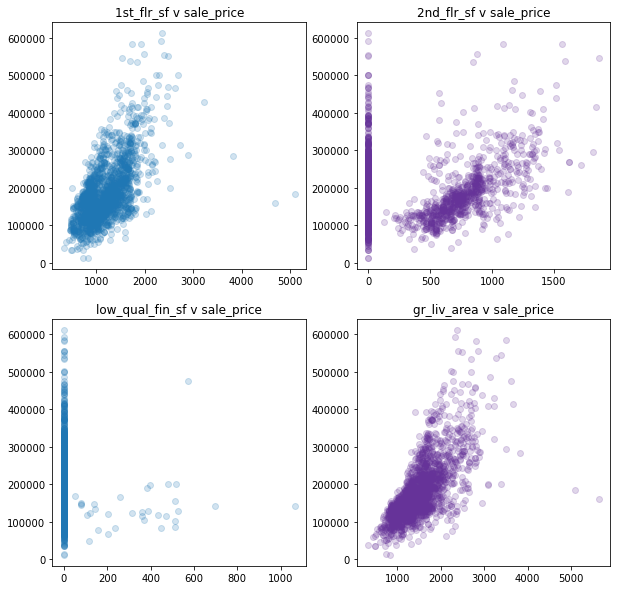

In [59]:
# map continuous variables to find outliers
figure, ax = plt.subplots(2,2,figsize = (10,10))

ax[0][0].scatter(train['1st_flr_sf'], train.saleprice,
              alpha = 0.2)
ax[0][0].set_title('1st_flr_sf v sale_price');

ax[0][1].scatter(train['2nd_flr_sf'], train.saleprice,
              alpha = 0.2,
              color = 'rebeccapurple')
ax[0][1].set_title('2nd_flr_sf v sale_price');

ax[1][0].scatter(train['low_qual_fin_sf'], train.saleprice,
              alpha = 0.2)
ax[1][0].set_title('low_qual_fin_sf v sale_price');

ax[1][1].scatter(train['gr_liv_area'], train.saleprice,
              alpha = 0.2,
              color = 'rebeccapurple')
ax[1][1].set_title('gr_liv_area v sale_price');

**Observations**
  *  `1st_flr_sf` and `gr_liv_area` have good correlations
  *  `2nd_flr_sf` has a large mass at 0 (can this be clustered?)
  *  `low_qual_fin_sf` has no correlation

In [60]:
train['half_bath'].value_counts().index

Int64Index([0, 1, 2], dtype='int64')

In [61]:
train.groupby('half_bath').mean().saleprice

half_bath
0    163751.821101
1    213622.831724
2    173912.388889
Name: saleprice, dtype: float64

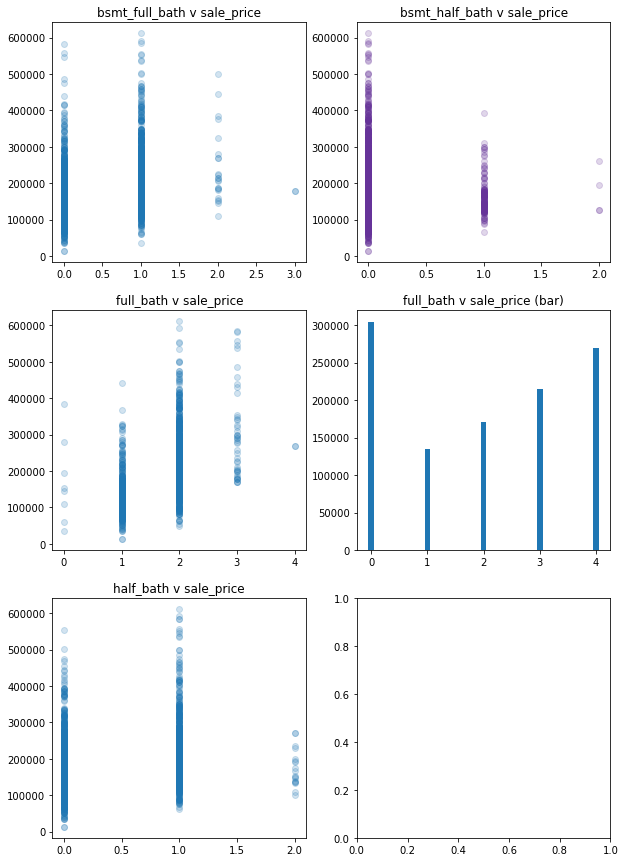

In [62]:
# map discrete variables to find outliers
figure, ax = plt.subplots(3,2,figsize = (10,15))

ax[0][0].scatter(train['bsmt_full_bath'], train.saleprice,
              alpha = 0.2)
ax[0][0].set_title('bsmt_full_bath v sale_price');

ax[0][1].scatter(train['bsmt_half_bath'], train.saleprice,
              alpha = 0.2,
              color = 'rebeccapurple')
ax[0][1].set_title('bsmt_half_bath v sale_price');

ax[1][0].scatter(train['full_bath'], train.saleprice,
              alpha = 0.2)
ax[1][0].set_title('full_bath v sale_price');

ax[1][1].bar(train['full_bath'].value_counts().index,
             train.groupby('full_bath').mean().saleprice,
             width = 0.1)
ax[1][1].set_title('full_bath v sale_price (bar)');

ax[2][0].scatter(train['half_bath'], train.saleprice,
              alpha = 0.2)
ax[2][0].set_title('half_bath v sale_price');

**Observations**
  *  `full_bath` is the only variable worth investigating I think. Aside from the zeroes, it looks like a positive correlation

In [63]:
# review electrical
train.electrical.unique()

# looks good!

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [64]:
# review central_air
train.central_air.unique()

# looks good!

array(['Y', 'N'], dtype=object)

### Recommendations for 41-50:
  *  Further analysis on `1st_flr_sf` and `gr_liv_area` as they have good correlations
  *  `2nd_flr_sf` might be good if zeroes are clustered(?)
  * `full_bath` should be analyzed further
  *  Other nominal / ordinal variables undetermined

### Cols 51-60

In [65]:
train.dtypes[50:60]

# looks good!

bedroom_abvgr      int64
kitchen_abvgr      int64
kitchen_qual      object
totrms_abvgrd      int64
functional        object
fireplaces         int64
fireplace_qu      object
garage_type       object
garage_yr_blt    float64
garage_finish     object
dtype: object

In [66]:
# check for nulls
train.isnull().sum()[50:60]

bedroom_abvgr       0
kitchen_abvgr       0
kitchen_qual        0
totrms_abvgrd       0
functional          0
fireplaces          0
fireplace_qu     1000
garage_type       113
garage_yr_blt     114
garage_finish     114
dtype: int64

**Observation**:
  *  `fireplace_qu` has significant null rate of $48\%$

In [77]:
# investigate garage_yr_blt outlier
train.garage_yr_blt.sort_values(ascending = False)
# pid 916384070

train.loc[[916384070],['year_built','year_remod_add','garage_yr_blt']]

,year_built,year_remod_add,garage_yr_blt
pid,,,
916384070,2006,2007,2207.0


In [79]:
# update to Null
train.loc[916384070, 'garage_yr_blt'] = np.nan

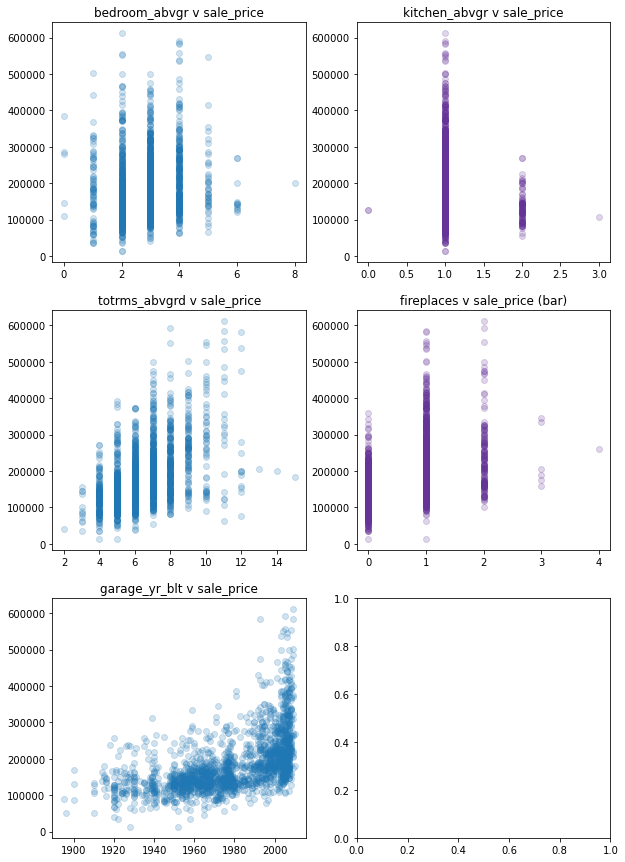

In [81]:
# map discrete variables to find outliers
figure, ax = plt.subplots(3,2,figsize = (10,15))

ax[0][0].scatter(train['bedroom_abvgr'], train.saleprice,
              alpha = 0.2)
ax[0][0].set_title('bedroom_abvgr v sale_price');

ax[0][1].scatter(train['kitchen_abvgr'], train.saleprice,
              alpha = 0.2,
              color = 'rebeccapurple')
ax[0][1].set_title('kitchen_abvgr v sale_price');

ax[1][0].scatter(train['totrms_abvgrd'], train.saleprice,
              alpha = 0.2)
ax[1][0].set_title('totrms_abvgrd v sale_price');

ax[1][1].scatter(train['fireplaces'], train.saleprice,
             alpha = 0.2,
              color = 'rebeccapurple')
ax[1][1].set_title('fireplaces v sale_price (bar)');

ax[2][0].scatter(train['garage_yr_blt'], train.saleprice,
              alpha = 0.2)
ax[2][0].set_title('garage_yr_blt v sale_price');

**Observations**:
  *  `bedroom_abvgr` has a positive correlation with `sale_price`
  *  `totrms_abvgr` has a positive correlation with `sale_price`
  *  `garage_yr_blt` has a weak positive correlation (after outlier removed)
*  **Future Note**: `garage_yr_blt` is probably very correlated with the build year of the home

In [83]:
# review kitchen_qual
train.kitchen_qual.unique()

# looks good!

array(['Gd', 'TA', 'Fa', 'Ex'], dtype=object)

In [89]:
# review functional
train.functional.unique()

# looks good

array(['Typ', 'Mod', 'Min2', 'Maj1', 'Min1', 'Sev', 'Sal', 'Maj2'],
      dtype=object)

In [92]:
# review fireplace_qu
train.fireplace_qu.unique()

# nan could be NA

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [94]:
# review garage_type
train.garage_type.unique()

# nan could be NA

array(['Attchd', 'Detchd', 'BuiltIn', 'Basment', nan, '2Types', 'CarPort'],
      dtype=object)

In [96]:
# review garage_finish
train.garage_finish.unique()

# nan could be NA

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

### Recommendations for 51-60:
  *  Further analysis on `bedroom_abvgr` and `totrms_abvgr` as they have good correlations
  * `garage_yr_blt` should be analyzed further
  *  `fireplace_qu` has way too many nulls
  *  Other nominal / ordinal variables undetermined

### Cols 61-70

In [97]:
train.dtypes[60:70]

garage_cars       float64
garage_area       float64
garage_qual        object
garage_cond        object
paved_drive        object
wood_deck_sf        int64
open_porch_sf       int64
enclosed_porch      int64
3ssn_porch          int64
screen_porch        int64
dtype: object

In [98]:
# check nulls
train.isnull().sum()[60:70]

garage_cars         1
garage_area         1
garage_qual       114
garage_cond       114
paved_drive         0
wood_deck_sf        0
open_porch_sf       0
enclosed_porch      0
3ssn_porch          0
screen_porch        0
dtype: int64

In [114]:
for i in ['wood_deck_sf','enclosed_porch','3ssn_porch','screen_porch']:
    print(train[i].value_counts(normalize=True)[:5])

0      0.524135
100    0.025841
144    0.022428
192    0.020965
120    0.019503
Name: wood_deck_sf, dtype: float64
0      0.840566
112    0.006338
96     0.004876
40     0.002925
216    0.002925
Name: enclosed_porch, dtype: float64
0      0.987323
168    0.001463
153    0.001463
144    0.000975
140    0.000488
Name: 3ssn_porch, dtype: float64
0      0.911750
144    0.004388
168    0.003901
192    0.003413
180    0.003413
Name: screen_porch, dtype: float64


**Observation** `wood_deck_sf`,`enclosed_porch`,`3ssn_porch`,`screen_porch` all have over 50% zero rates

# Future Ideas

future idea: nominals / ordinals that are not represented fully in the dataset could be dropped

In [ ]:
# https://stackoverflow.com/questions/62666417/python-check-if-an-integer-is-all-the-same-digit
def find_nines(in_lst):
    # make all elements str
    new_lst = [str(i) for i in in_lst]
    
    # make each element a set, check its length to see if they are all the same
    # also, check to see if the set is exactly '9'
    new_lst = [(len(set(i)) == 1) & (set(i) == {'9'}) for i in new_lst]
    
    return new_lst

In [ ]:
find_nines([1,11,22,33,454,99999])

# Kaggle Submission Instructions

In [ ]:
submission = pd.DataFrame()

for submissions you want two cols, one is ids (PID) and the other is predicted sale price
  *  `Id` and `SalePrice`
  
kaggle will expect 878 total submissions!

In [ ]:
submission['Id'] = train.index

In [ ]:
submission.head()

In [ ]:
submission.shape

In [ ]:
submission['SalePrice'] = train.saleprice.mean()

In [ ]:
submission.head()

In [ ]:
submission.shape

In [ ]:
submission.to_csv('datasets/dummy_submission.csv', index = False)

In [ ]:
sub_test = pd.read_csv('datasets/dummy_submission.csv')

In [ ]:
sub_test.head()